In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [4]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=54


In [35]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Desktop/PotatoDisease",# replace Desktop/PotatoDisease to PotatoDisease
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)



Found 2152 files belonging to 3 classes.


In [36]:
class_names=dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [37]:
len(dataset)


68

(32, 256, 256, 3)
[0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1]


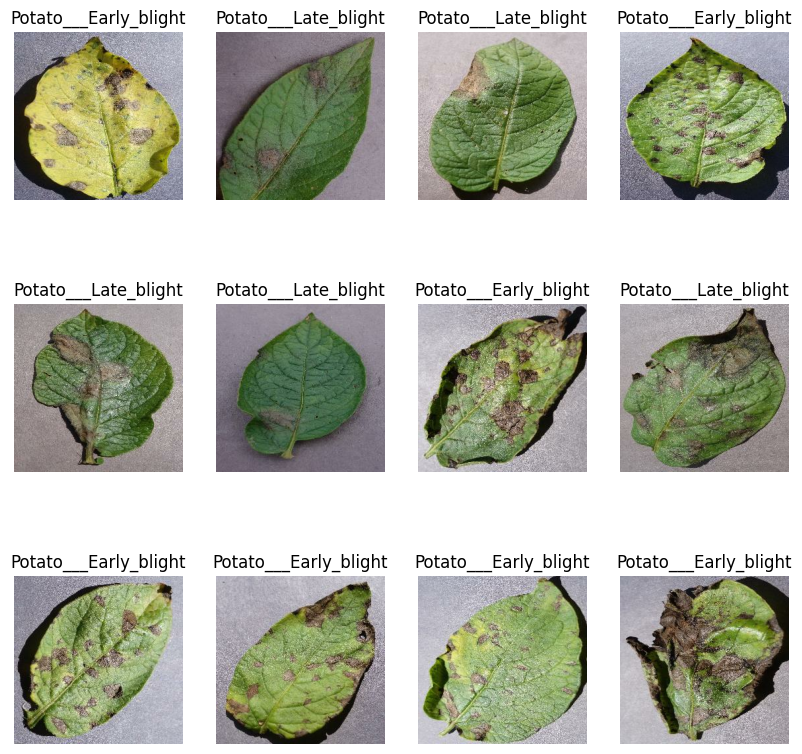

In [38]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    
    
    
    

In [39]:
train_size=0.8
len(dataset)*train_size


54.400000000000006

In [40]:
train_ds=dataset.take(54)


In [41]:
test_ds=dataset.skip(54)
len(test_ds)


14

In [42]:
val_size=0.1
len(dataset)*val_size


6.800000000000001

In [43]:
val_ds=test_ds.take(6)
len(val_ds)


6

In [44]:
test_ds=test_ds.skip(6)
len(test_ds)


8

In [45]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    val_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds


In [46]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)


In [47]:
len(train_ds)


54

In [48]:
len(val_ds)


8

In [49]:
len(test_ds)


8

In [50]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [51]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),

    layers.experimental.preprocessing.Rescaling(1.0/255)
])


In [52]:
tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


In [53]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [54]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [56]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)


Epoch 1/54
54/54 [==============================] - 148s 3s/step - loss: 0.9321 - accuracy: 0.4502 - val_loss: 0.9272 - val_accuracy: 0.6082
Epoch 2/54
54/54 [==============================] - 127s 2s/step - loss: 0.9197 - accuracy: 0.5087 - val_loss: 0.8926 - val_accuracy: 0.4850
Epoch 3/54
54/54 [==============================] - 132s 2s/step - loss: 0.7259 - accuracy: 0.6684 - val_loss: 0.4244 - val_accuracy: 0.8322
Epoch 4/54
54/54 [==============================] - 146s 3s/step - loss: 0.4433 - accuracy: 0.8235 - val_loss: 0.2973 - val_accuracy: 0.8889
Epoch 5/54
54/54 [==============================] - 143s 3s/step - loss: 0.3041 - accuracy: 0.8715 - val_loss: 0.1978 - val_accuracy: 0.9213
Epoch 6/54
54/54 [==============================] - 134s 2s/step - loss: 0.2395 - accuracy: 0.9045 - val_loss: 0.1636 - val_accuracy: 0.9392
Epoch 7/54
54/54 [==============================] - 143s 3s/step - loss: 0.1873 - accuracy: 0.9277 - val_loss: 0.1710 - val_accuracy: 0.9358
Epoch 8/54
54

In [57]:
scores=model.evaluate(test_ds)


54/54 [==============================] - 24s 436ms/step - loss: 3.5235e-05 - accuracy: 1.0000


In [58]:
history


In [59]:
history.params


{'verbose': 1, 'epochs': 54, 'steps': 54}

In [60]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [61]:

history.history['accuracy']


[0.45023149251937866,
 0.5086805820465088,
 0.6684027910232544,
 0.8234953880310059,
 0.8715277910232544,
 0.9045138955116272,
 0.9276620149612427,
 0.9270833134651184,
 0.9299768805503845,
 0.9565972089767456,
 0.9560185074806213,
 0.9728009104728699,
 0.9664351940155029,
 0.9675925970077515,
 0.9456018805503845,
 0.9675925970077515,
 0.9884259104728699,
 0.9664351940155029,
 0.9861111044883728,
 0.9936342835426331,
 0.9936342835426331,
 0.9965277910232544,
 0.984375,
 0.9890046119689941,
 0.9947916865348816,
 0.9652777910232544,
 0.9809027910232544,
 0.9913194179534912,
 0.9982638955116272,
 1.0,
 0.9936342835426331,
 0.9971064925193787,
 0.9988425970077515,
 0.9982638955116272,
 0.9768518805503845,
 0.9733796119689941,
 0.9855324029922485,
 0.9913194179534912,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


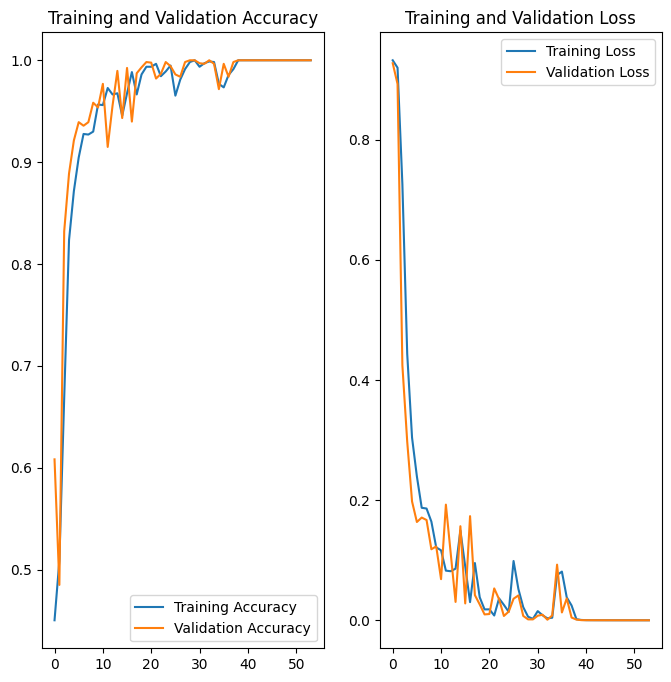

In [63]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 735ms/step
predicted label: Potato___Early_blight


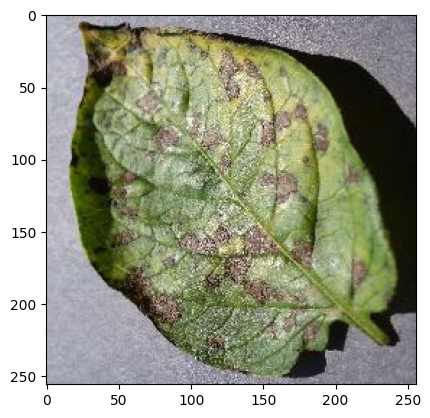

In [64]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    u

In [65]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 47ms/step


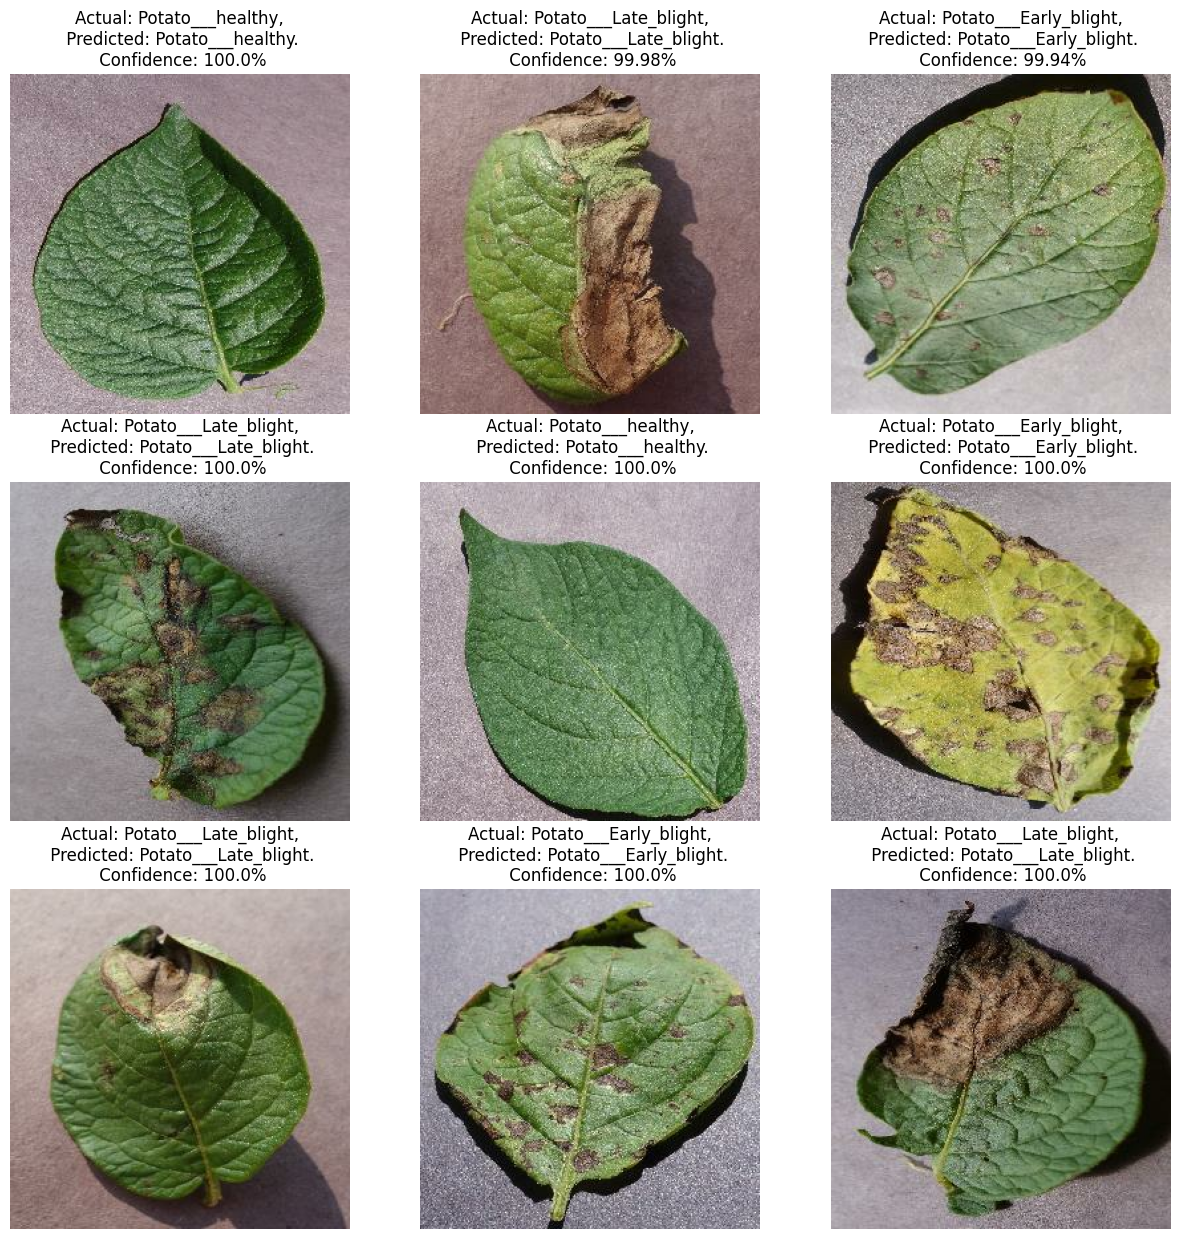

In [66]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [77]:

import os
model_version=max([int(i) for i in os.listdir("Desktop/_SIH_MODEL/") + [0]])+1  #replace Desktop/_SIH_MODEL/ to PlantDisease/model/
model.save(f"Desktop/_SIH_MODEL/{model_version}")


INFO:tensorflow:Assets written to: Desktop/_SIH_MODEL/2\assets


INFO:tensorflow:Assets written to: Desktop/_SIH_MODEL/2\assets


In [140]:
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import base64
from io import BytesIO
import numpy as np

In [141]:
# Load your pre-trained model (replace with the actual path to your model)
model_path = "Desktop/_SIH_MODEL/2"
model = tf.keras.models.load_model(model_path)


In [142]:
# Layout of dashboard with the image upload component i.e. instance crration
app = dash.Dash(__name__)
app.title = "PotatoD*3"

In [143]:
app.layout = html.Div([
    html.H1("Potato Disease Detection Dashboard"),

    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select a File')
        ]),
        style={
            'width': '50%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px auto'
        },
        multiple=False
    ),
    
    html.Div(id='output-image'),
])

In [144]:
# Creating a callback function to process the uploaded image i.e. is for the updation of the images uploaded
@app.callback(Output('output-image', 'children'), Input('upload-image', 'contents'))
def process_uploaded_image(contents):
    if contents is not None:
        content_type, content_string = contents.split(',')
        image_data = base64.b64decode(content_string)
        
        # Load and preprocess the uploaded image
        image = tf.image.decode_image(image_data)
        image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.expand_dims(image, axis=0) 
        
        # Use your model to make predictions
        predictions = model.predict(image)
        predicted_class = class_names[np.argmax(predictions[0])]
        
        # Create an HTML element to display the uploaded image and prediction
        image_element = html.Div([
            html.Img(src='data:image/png;base64,{}'.format(base64.b64encode(image_data).decode())),
            html.H3(f"Predicted Class: {predicted_class}")
        ])
        
        return image_element

In [145]:
# Run the Dash app
#http://127.0.0.1:8050/  for web browsing
if __name__ == '__main__':
    app.run_server(debug=True)

1/1 [==============================] - 1s 730ms/step
